<a href="https://colab.research.google.com/github/theorignalmapdcodex/aipi590_i-4_et2/blob/main/notebooks/pdp%2Bice%2Bale_plot_interpretation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

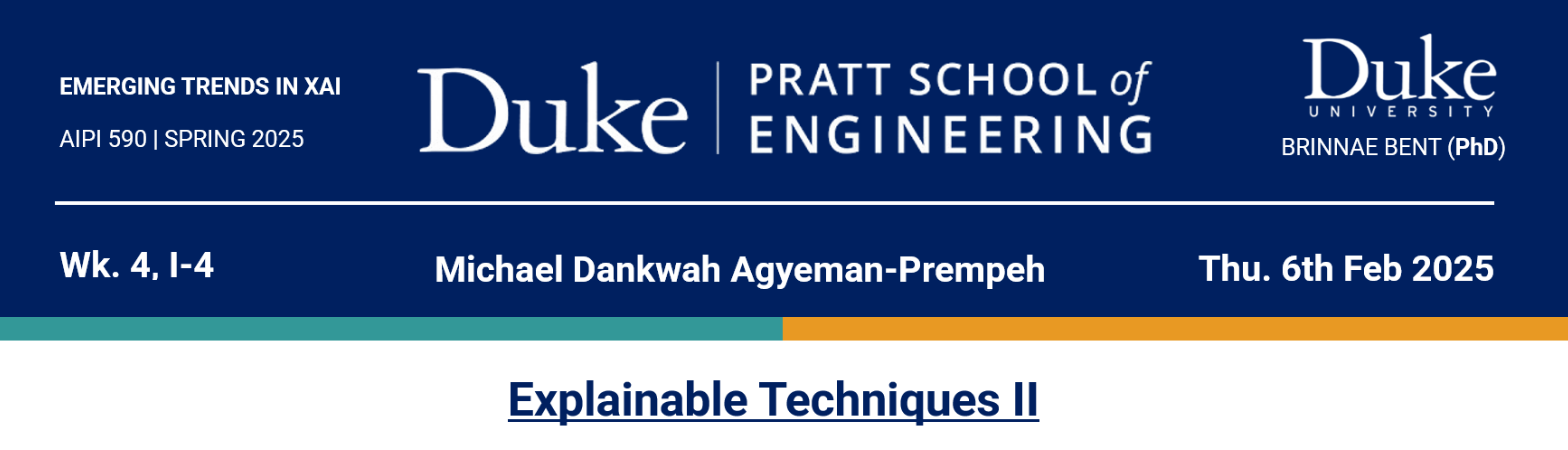

In [1]:
# Downloading external files [the dataset & requirements.txt] for Processing as well as package installation (With the Idea of Sharing to Others)

!pip install -U gdown  # Installing gdown if not already installed

# Grabbing actual file IDs from the Google Drive shared links
reqtxt_file_id = "1zgXQ_EORa0wMpZzLsCIeV4_kbsDVM_CJ"
datacsv_file_id = "1RQNT9uWaEwn0rxkRPVVcVPM_S2MLgJtA"

reqtxt_output_file = "requirements.txt"  # Name to save the file locally so anyone with document can run
datacsv_output_file = "I-5_Data_v2.csv"  # Name to save the file locally so anyone with document can run

# Download the file
!gdown "https://drive.google.com/uc?id={reqtxt_file_id}" -O {reqtxt_output_file}
!gdown "https://drive.google.com/uc?id={datacsv_file_id}" -O {datacsv_output_file}

# Installing dependencies
!pip install -r requirements.txt

Downloading...
From: https://drive.google.com/uc?id=1zgXQ_EORa0wMpZzLsCIeV4_kbsDVM_CJ
To: /content/requirements.txt
100% 103/103 [00:00<00:00, 342kB/s]
Downloading...
From: https://drive.google.com/uc?id=1RQNT9uWaEwn0rxkRPVVcVPM_S2MLgJtA
To: /content/I-5_Data_v2.csv
100% 1.21M/1.21M [00:00<00:00, 40.1MB/s]
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 630.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 7.4 MB/s eta 0:00:00


>#### 🔗 **1. GitHub Link:**
- Click [here](https://github.com/theorignalmapdcodex/aipi590_i-4_et2/blob/main/notebooks/pdp%2Bice%2Bale_plot_interpretation.ipynb) to access the *GitHub repository .ipynb* file for this assignment.

## 🥅 **Project Goal:**
### *The goal of this assignment is to gain a deep understanding of explainable AI (XAI) techniques, specifically focusing on Partial Dependence Plots (PDP), Individual Conditional Expectation (ICE) plots, and Accumulated Local Effects (ALE) plots.*

<br>

--------------------------------------------------------------------------------

In [2]:
# To ignore warnings for code output to look clean
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import os

# # Remove Colab default sample_data if it exists
# if os.path.exists("./sample_data"):
#     !rm -r ./sample_data

# # Clone GitHub files to colab workspace
# repo_name = f'{aipi590_i-4_et2}'

# # Check if the repo already exists
# if not os.path.exists("/content/" + repo_name):
#     git_path = f'{https://github.com/theorignalmapdcodex/aipi590_i-4_et2.git}'
#     !git clone "{git_path}"
# else:
#     print(f"{aipi590_i-4_et2} already exists.")

# # Change working directory to location of notebook
# path_to_notebook = os.path.join("/content/" + aipi590_i-4_et2)
# %cd "{path_to_notebook}"
# %ls

## 📚 **I. Libraries & Packages Installation**

In [4]:
# For the purposes of working on Colab independently
!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /tmp/pip-install-qpbgzpqt/alepython_c59b88652e184f99ab30c4b283dec484
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /tmp/pip-install-qpbgzpqt/alepython_c59b88652e184f99ab30c4b283dec484
  Resolved https://github.com/MaximeJumelle/ALEPython.git to commit 286350ab674980a32270db2a0b5ccca1380312a7
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 1.9 MB/s eta 0:00:00
  Created wheel for alepython: filename=alepython-0.1.dev17+g286350a-py3-none-any.whl size=15139 sha256=3cc42381a5e625e5596d7cc501e54fee1146b2d42170af1fc8791b561b314e24
  Stored in directory: /tmp/pip-ephem-wheel-cache-u__aff4s/wheels/ac/d2/e4/cd88ce55641d5422cdba165bd6f18c6fb6c0035385dc2bcce2
Successfully built alepython


In [5]:
#Install the requirements for this package and included in requirements.txt file
!pip install -r requirements.txt

In [ ]:
# General packages for EDA, Plotting etc.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for Machine Learning purposes evaluating my choice of model
import xgboost
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

# Packages from last assignment
import shap

# Packages from XAI course
import shap
from alepython import ale_plot
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance

## ⚙️ **III. Assessing, Cleaning and Exploratory Data Analysis on Chosen Dataset**

In [ ]:
# i. Sourcing the Bull City streaming data                                                                                                                                                                   #----> via me on 5 Feb 25 @ 7:30pm
# Bull City Streaming Data - The data presented examines three treatments of tile artwork for the video and short streaming service, “Bull City Streaming.”
# https://drive.google.com/file/d/1RQNT9uWaEwn0rxkRPVVcVPM_S2MLgJtA/view

# bcs_data = pd.read_csv('/content/drive/MyDrive/MEngDTI@Duke/DTK530/I-5/ABtest&CAdata/I-5_Data_v2.csv')
# Load the CSV file into a DataFrame
bcs_data = pd.read_csv(datacsv_output_file)

# No of rows
bcs_data_rows = bcs_data.shape[0]
# No of columns
bcs_data_columns = bcs_data.shape[1]
# Get the values
print(bcs_data_rows,'\n',bcs_data_columns)

# Showing first 10 rows of table
bcs_data.info()
bcs_data.describe()
bcs_data.head(10)

In [ ]:
# ii - Task 1: Dropping the Treatment and UserID columns as I won't be performing any form of Cohort Analyis and even the Geographical Region and Date columns as working with fully numerical values would be ideal                        #----> via me on 5 Feb 25 @ 8:05pm
bcs_data = bcs_data.drop(columns=['User ID','Treatment', 'Geographical Region', 'Date'])

In [ ]:
# ii - Task 2: Checking for null values for all columns
print(bcs_data.isnull().sum())

From the dataframe description and checking for null value function above, we see that `Completion Rate (%)`, a very important feature which will be included in the x variables for buidling my model of choice, has a lot of `null values`(12,513) and hence how we treat this column is crucial.

From my analysis, it will be better if I <mark>fill missing values with the mean or median of the existing values (they are numerical values)</mark> rather than dropping the rows as I believe it contributes to the prediction of the `Conversion` feature (the feature I will select as my target (y) variable).

In [ ]:
# ii - Task 3: Filling the empty table cells with mean values in the Completion Rate (%) column of bcs_data with mean values with the aim of protecting the power of our model yet to be built

bcs_data['Completion Rate (%)'].fillna(bcs_data['Completion Rate (%)'].mean(), inplace=True)                        #----> via Gemini AI on 5 Feb 25 @ 8:19pm

In [ ]:
# Showing first 10 rows of table again
bcs_data.info()
bcs_data.describe()
bcs_data.head(10)

In [ ]:
# ii - Task 4: Converting the 'Conversion' column to recode to 0-False and 1-True for better model training and development as it's the ideal data type for most ML models like Random Forest Modeling                                                       #----> via Gemini AI on 6 Feb 25 @ 1:44am
bcs_data['Conversion'] = bcs_data['Conversion'].astype(int)
bcs_data.head(10)

Now, there are no `null` values in our dataframe and from the description.

And also, the class distribution of our target variable is fair so, we're good to go.

Yay! 🎊

## 💻 **IV. Correlation Between Features/Variables**

Before we build the model and even start plotting, we need to:
- Check for the correlation between features (two see if two things are connected, that is, as one ⬆️ or ⬇️, what happens to the other). The `Conversion` column is already in boolean format so our correlation matrix will be easy to build (no need for one-hot encoding)
- Select a dependent (target) variable (y) and the rest as independent variables (x)

**a. To check for correlation between features, we can use a correlation matrix**

In [ ]:
# Creating and visualizing the correlation matrix
correlation_matrix = bcs_data.corr()                                                    #----> via Gemini AI on 5 Feb 25 @ 8:35pm

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of BCS Data')

plt.show()

In [ ]:
# Identifying highly correlated elements by code                                                  #----> via Gemini AI on 5 Feb 25 @ 9:19pm but refined by me (introducied 'if clause')
# Threshold for considering features as highly correlated
threshold = 0.8

# Finding pairs of features with correlation above the threshold
corr_pairs = correlation_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)

highly_correlated = corr_pairs[(corr_pairs < 1) & (corr_pairs >= threshold)]

if highly_correlated.empty:
    print("No highly correlated features found.")
else:
    print("Highly correlated feature pairs:")
    print(highly_correlated)

**Interpretation:**
- Since from the analysis above, we have no highly correlated features, it basically means the features are not highly redundant and might be contributing something unique.

It would be nice to see how important these features are after model training.

## ✨ **V. Training and Building the Random Forest Model After Oversampling**

> I will go on to select my target variable, `Conversion` and the other x variables but before that, let's check to make sure there's no `class imbalance`

In [ ]:
# Checking for class imbalance in 'Conversion' column of bcs data
# Class distribution of the target variable 'Conversion'
class_distribution = bcs_data['Conversion'].value_counts()                                  #---- > via me on 5 Feb 25 @ 10:29pm

print("Class Distribution of 'Conversion':")
print(class_distribution)

# Plotting the class distribution                                                           #----> via Gemini AI @ 10:30pm
plt.figure(figsize=(6, 4))
sns.countplot(data=bcs_data, x='Conversion')
plt.title('Class Distribution of Conversion Before Oversampling')
plt.xlabel('Conversion')
plt.ylabel('Count')
plt.show()

From the above, we see there's the presence of `class imbalance` (~8500 Trues and ~12,500 Falses). To cater for this, we can perform `oversampling using SMOTE (Synthetic Minority Over-sampling Technique)`.

But before we proceed to do that, let's see how the model will perform before we `oversample`.

In [ ]:
# Splitting bcs_data into X and Y for model training before oversampling!                                                                          #----> via me on 5 Feb 25 @ 10:33pm
target_feature = 'Conversion'

Y = bcs_data[target_feature]
X = bcs_data.drop(target_feature, axis=1)

print(X.head())
print(Y.head())


# Train a Random Forest (Before Oversampling)                                                                                                           #----> via Gemini AI on 5 Feb 25 @ 10:36pm
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y) # Stratify important!

rf_before = RandomForestClassifier(random_state=42)
rf_before.fit(X_train, Y_train)
Y_pred_before = rf_before.predict(X_test)

print("Random Forest Performance Before Oversampling:")
print(classification_report(Y_test, Y_pred_before))
cm_before = confusion_matrix(Y_test, Y_pred_before)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_before, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix Before Oversampling")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Now, let's proceed to `'smote'` our data!

In [ ]:
# Applying SMOTE Oversampling                                                                               #----> via Gemini AI on 5 Feb 25 @ 10:36pm (All of the SMOTE code)
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

print("\nClass counts after oversampling: ", pd.Series(Y_train_resampled).value_counts())

sns.countplot(x=Y_train_resampled)
plt.title('Class Distribution (After Oversampling)')
plt.show()

### Now we can use `X_train_resampled` and `Y_train_resampled` for training the model

In [ ]:
# Training the Random Forest Model After Oversampling                                                            #----> via Gemini AI on 5 Feb 25 @ 10:36pm
rf_after = RandomForestClassifier(random_state=42)
rf_after.fit(X_train_resampled, Y_train_resampled)
Y_pred_after = rf_after.predict(X_test)

print("\nRandom Forest Performance After Oversampling:")
print(classification_report(Y_test, Y_pred_after))
cm_after = confusion_matrix(Y_test, Y_pred_after)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_after, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (After Oversampling)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

From the analysis and `confusion matrix` plots, I realised before and after sampling that they remained the same even though the `class distribution` was balanced now - `10,010 Trues, 10010 Falses`.

After some research and searches via Gemini AI, I realised that the model I chose, `Random Forest` was relatively robust to the level or degree of `class imbalance` I had detected earlier hence the same results for the `confusion matrices`.

In [ ]:
# Getting predicted probabilities for the positive class                                                                                                      #----> via Gemini AI on 6 Feb 25 @ 12:54am
y_prob_before = rf_before.predict_proba(X_test)[:, 1]
y_prob_after = rf_after.predict_proba(X_test)[:, 1]

# Calculating ROC curve and AUC for before oversampling
fpr_before, tpr_before, thresholds_before = roc_curve(Y_test, y_prob_before)
roc_auc_before = roc_auc_score(Y_test, y_prob_before)

# Calculating ROC curve and AUC for after oversampling
fpr_after, tpr_after, thresholds_after = roc_curve(Y_test, y_prob_after)
roc_auc_after = roc_auc_score(Y_test, y_prob_after)

# Plotting ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_before, tpr_before, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_before:.2f}) - Before Oversampling')
plt.plot(fpr_after, tpr_after, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc_after:.2f}) - After Oversampling')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

From the above `ROC curve`, I can say we have a model and we can proceed to plotting the necessary graphs!

### **<mark>Extras</mark>**

In [ ]:
# Verifying the class distribution after oversampling                                                                                       #---- > Print code developed by me on 6 Feb @ 12:56am
print("Class distribution before oversampling:", Y.value_counts(), "\n\n", "--------------------------------------------------", "\n")
print("Class distribution after oversampling:", Y_train_resampled.value_counts())

In [ ]:
# Let's run plot a correlation matrix again to see what has changed                                                                   #----> via me on 6 Feb 25 @ 1:00am (referenced from old data science notebook)
new_bcs_data = pd.concat([X_train_resampled, Y_train_resampled], axis=1)

corr_matrix = new_bcs_data.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix after Oversampling')
plt.show()

From the above chart, not much has changed from our initial correlation matrix. However, for example, we can see a `0.57` to `0.58` changed between the `Likes` and `Views` features.

### Let's check which features are important and with that information, we can proceed to plotting our PDP, ICE and ALE plots.

In [ ]:
# Plotting the top 3 features from random forest after oversampling                                                                                               #----> via Gemini AI on 6 Feb 25 @ 1:10am
# Accessing feature importances
importances = rf_after.feature_importances_
feature_names = X.columns
feature_importance = pd.Series(importances, index=feature_names)

# Sort feature importances
feature_importance_sorted = feature_importance.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importance_sorted.plot(kind='bar')
plt.title('Feature Importances After Oversampling')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Selecting top 3 features
top_3_features = feature_importance_sorted.head(3)

# Printing the top 3 important features
# Changed 'feat_imp' to 'feature_importance_sorted' which holds the sorted feature importances.
top3_features = feature_importance_sorted.index[:3]
print('\n\n', 'Top 3 important features:')
print(top3_features)

## 🅿️ **VI. The Plots**

> ## **📈 Plot #1: Partial Dependence Plots (PDP)** 🌓

In [ ]:
# Using the top 3 features - 'Completion Rate (%)', 'Engagement Time (min)', 'Shares'                                                     #----> via DUKE-AI-XAI (AIPI590) global_explanations.ipynb file on 6 Feb 25 @ 1:25am
fig, ax = plt.subplots(figsize=(15, 5))                                                                                                   #----> via Gemini AI on 6 Feb 25 @ 1:28am

PartialDependenceDisplay.from_estimator(rf_after, X_test, top3_features, kind='average',
                                        n_cols=3, ax=ax)                   # For PDP, the kind is 'average'
plt.show()

### **Interpretation of PDP 1st Order Plots**
1. **Completion Rate (%)**
   - **X-axis**: Represents the percentage of the video completed.
   - **Y-axis**: Shows the partial dependence of **Conversion** on Completion Rate.
   - **Observation**:
     - The curve is mostly **flat but with a pin-like nature** near 1.0, indicating **high conversion** for most values.
     - A sharp dip around **40-50% completion** suggests a significant drop in conversion probability at this range.
     - This could imply a critical moment in the video where engagement weakens.

2. **Engagement Time (min)**
   - **X-axis**: Represents the total minutes of user engagement.
   - **Y-axis**: Measures the effect of Engagement Time on Conversion.
   - **Observation**:
     - The plot is nearly **flat**, indicating **little to no effect** of Engagement Time on conversion.
     - Small variations suggest that Engagement Time is not a strong predictor.

3. **Shares**
   - **X-axis**: Represents the number of times the content was shared.
   - **Y-axis**: Shows the influence of Shares on Conversion.
   - **Observation**:
     - The plot is almost flat, meaning **sharing has minimal impact** on conversion.
     - The lack of a strong upward trend suggests that **increased shares do not necessarily drive more conversions**.

> ## **📉 Plot #2: Individual Conditional Expectation Plots (ICE)** 🧊

In [ ]:
# Similarly, using the top 3 features - 'Completion Rate (%)', 'Engagement Time (min)', 'Shares'                                                     #----> via DUKE-AI-XAI (AIPI590) global_explanations.ipynb file on 6 Feb 25 @ 1:25am
fig, ax = plt.subplots(figsize=(15, 5))                                                                                                              #----> via Gemini AI on 6 Feb 25 @ 1:28am

PartialDependenceDisplay.from_estimator(rf_after, X_test, top3_features, kind='individual',
                                        n_cols=3, ax=ax)                   # For ICE, the kind is 'individual'
plt.show()

### **Interpretation of ICE (Individual Conditional Expectation) Plots**

These ICE plots provide a more granular view of how **individual instances** respond to changes in the features **Completion Rate (%), Engagement Time (min), and Shares** with respect to **Conversion**.

1. **Completion Rate (%)**
   - **X-axis**: Percentage of video completed.
   - **Y-axis**: Partial dependence for each individual instance.
   - **Observation**:
     - Most lines remain **near 1.0**, indicating **high conversion rates** across different completion values.
     - A sharp drop occurs around **40-50% completion**, meaning that for many instances, conversion probability **significantly decreases** at this range.
     - This suggests a possible **point of disengagement** or an issue with the content at that stage.

2. **Engagement Time (min)**
   - **X-axis**: Total minutes of user engagement.
   - **Y-axis**: Partial dependence for each instance.
   - **Observation**:
     - Most individual lines are **flat**, reinforcing that **engagement time has little effect** on conversion.
     - Some minor variations suggest a **slight upward trend** for a few users, but overall, engagement time does **not strongly influence conversion**.

3. **Shares**
   - **X-axis**: Number of times content was shared.
   - **Y-axis**: Partial dependence for individual instances.
   - **Observation**:
     - Most ICE curves remain **flat**, meaning **sharing does not significantly affect conversion** for most users.
     - Some minor deviations indicate **small impacts for a subset of users**, but the trend is weak.

Since, scikit-learn does not support looking at individual instances in their PartialDependenceDisplay and it would be ideal view individual instances, we will need to code the plots ourselves using numpy and matplotlib (`quote by Dr. Brinnae Bent in explainable-ml-example-notebooks
/local_explanations.ipynb from Duke-AI-XAI Github repo`).

In [ ]:
# Choosing the instance and feature for which I want to plot the instance of the ICE plot                                                      #----> via DUKE-AI-XAI (AIPI590) local_explanations.ipynb file on 6 Feb 25 @ 2:25am
instance_index = 50  # Choosing the 50 of the instance to visualize
feature_index = 0  # Let's look at 'Completion Rate (%)'

# Create feature grid
feature_values = np.linspace(np.min(X.iloc[:, feature_index]), np.max(X.iloc[:, feature_index]), num=50)

# Initialize array to store average predictions
average_predictions = np.zeros_like(feature_values)

# Extract the instance of interest
instance = X.iloc[[instance_index]]

# Duplicate the instance to modify feature values
instance_modified = instance.copy()

# Loop over feature values
for i, value in enumerate(feature_values):
    # Set the chosen feature to the current value for the instance:
    instance_modified.iloc[:, feature_index] = value

    # Predict using the modified instance:
    prediction = rf_after.predict_proba(instance_modified)[:, 1]

    # Store the prediction for the current feature value:
    average_predictions[i] = prediction.item()

# Plot the ICE plot
plt.plot(feature_values, average_predictions)
plt.xlabel(f'Feature values')
plt.ylabel('Predicted probability of class 1')
plt.title(f'ICE Plot - Instance Index: {instance_index}')
plt.show()

**Single Graph (Instance-Specific ICE Plot)**
- This ICE plot represents the effect of feature values on the conversion probability for a single instance (index 50).
- The predicted probability is generally very low, showing erratic fluctuations at certain values.
- At specific feature values (e.g., around 75-100 and near 200), there are sharp peaks, indicating potential non-linearity in the model's response.
- The model (`rf_after`) suggests that for this particular instance, conversion is unlikely except at very specific feature values.

> ## **📊 Plot #3: Accumulated Local Effects Plots (ALE)** 🫚

In [ ]:
# Using default parameters for 1D Main Effect ALE Plot but with 20 bins                                                                         #----> via DUKE-AI-XAI (AIPI590) global_explanations.ipynb file on 6 Feb 25 @ 2:35am
for feature in top3_features:
    ale_plot(rf_after, X_train, feature, bins=20, monte_carlo=True)

### **Interpretation of ICE (Individual Conditional Expectation) Plots**

Completion Rate Graph:
* X-axis: Distribution from 0% to 90% completion rate, with clear granularity in 10% increments
* Y-axis: Substantial effect range from -0.2 to 0.3 on predictions, showing strong feature influence
* Observation: Distinctive V-shaped curve with dramatic transitions around 40-60% range; multiple Monte Carlo simulations (blue lines) show consistency in the pattern

Engagement Time Graph:
* X-axis: Comprehensive time range from 0 to 200 minutes, broken down into 5% percentile marks
* Y-axis: Minimal effect range from -0.04 to 0.04, indicating negligible impact
* Observation: Remarkably consistent horizontal line at 0 across the entire time spectrum, with no variance

Shares Graph:
* X-axis: Share count from 0.5 to 2.5, with 33.3% and 66.7% percentile markers
* Y-axis: Limited effect range from -0.04 to 0.04, showing no variability
* Observation: Perfect horizontal line at 0, with just 3 bins indicating limited share count variation

--------------------------------------------------------------------------------

## 🔚 **Conclusion:**

## *Interesting Findings:*

> ### **1. Key Takeaways from PDP 1st Order Plots**
- **Completion Rate** is the most influential factor affecting conversion, particularly around 40-50% completion.
- **Engagement Time and Shares have minimal impact** on conversion in this dataset.
- This suggests **improving content design around mid-completion** could enhance conversion rates.

> ### **2. Key Takeaway from ICE plots**
- The **Completion Rate (%)** remains the strongest driver of conversion, with a **clear drop at 40-50%**.
- **Engagement Time and Shares have minimal influence** on conversion.
- ICE plots reinforce the PDP conclusions, but with added insights into **how individual instances behave** differently across feature values.
- **For individual cases, predictions can be erratic**, likely due to model complexity or feature interactions.

> ### **3. Key Takeaway from ALE plots**
- Content either needs to be gripping in the first 40% or viewers need to push past the 60% mark for optimal conversion. The middle zone (50%) represents a critical dropout point that significantly hurts conversion
- Duration of engagement surprisingly has no bearing on conversion rates, suggesting that quality of engagement matters more than quantity
- Social sharing behavior does not predict or influence conversion rates, suggesting viral effects may not impact individual conversion decisions

**Overall Key Finding:** In the Bull City Streaming ecosystem, completion rate emerges as the sole significant predictor of conversion, with a clear "critical zone" around 50% completion. This suggests focusing optimization efforts on early engagement (first 40%) and encouraging push-through past the 60% mark, rather than on extending engagement time or promoting social sharing.

---

- ### *Differences Between PDP and ALE Plots:*
Text goes here.

---

- ### *Commenting on Correlation Matrix and Impact on Plot Results:*

My correlation matrix before and after oversampling didn't have much to say about the plots as the only correlated elements were the `Likes` and `Views` features.

I was hoping to do more research to investigate what it means if your features have no high correlation and what it means for your model.

One thing I know is majority of the features going close to `0.00` or `-0.00` just means that the model won't have highly redundant features to skew it's prediction. Maybe they offer something unique and firther analysis may help with that.